We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

In [1]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import os
os.chdir('/Users/reinaldodeoliveiramaciel/Downloads')

## Load and review data

In [7]:
cData = pd.read_csv("auto-mpg.csv")  
cData.shape

(398, 9)

In [8]:
# 8 variables: 
#
# MPG (miles per gallon), 
# cylinders, 
# engine displacement (cu. inches), 
# horsepower,
# vehicle weight (lbs.), 
# time to accelerate from O to 60 mph (sec.),
# model year (modulo 100), and 
# origin of car (1. American, 2. European,3. Japanese).
#
# Also provided are the car labels (types) 
# Missing data values are marked by series of question marks.


cData.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
#dropping/ignoring car_name 
cData = cData.drop('car_name', axis=1)
# Also replacing the categorical var with actual values
cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
cData.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


## Create Dummy Variables
Values like 'america' cannot be read into an equation. Using substitutes like 1 for america, 2 for europe and 3 for asia would end up implying that european cars fall exactly half way between american and asian cars! we dont want to impose such an baseless assumption!

So we create 3 simple true or false columns with titles equivalent to "Is this car America?", "Is this care European?" and "Is this car Asian?". These will be used as independent variables without imposing any kind of ordering between the three regions.




In [10]:
cData = pd.get_dummies(cData, columns=['origin', 'cyl'])
cData.head()

,mpg,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
0,18.0,307.0,130,3504,12.0,70,1,0,0,0,0,0,0,1
1,15.0,350.0,165,3693,11.5,70,1,0,0,0,0,0,0,1
2,18.0,318.0,150,3436,11.0,70,1,0,0,0,0,0,0,1
3,16.0,304.0,150,3433,12.0,70,1,0,0,0,0,0,0,1
4,17.0,302.0,140,3449,10.5,70,1,0,0,0,0,0,0,1


## Dealing with Missing Values

In [11]:
#A quick summary of the data columns
cData.describe()

,mpg,disp,wt,acc,yr,origin_america,origin_asia,origin_europe,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879,0.010050,0.512563,0.007538,0.211055,0.258794
std,7.815984,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197,0.099871,0.500471,0.086601,0.408571,0.438523
min,9.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,29.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# hp is missing cause it does not seem to be reqcognized as a numerical column!
cData.dtypes

mpg               float64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america      uint8
origin_asia         uint8
origin_europe       uint8
cyl_3               uint8
cyl_4               uint8
cyl_5               uint8
cyl_6               uint8
cyl_8               uint8
dtype: object

In [16]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
cData[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false


,mpg,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8


In [17]:
# Missing values have a'?''
# Replace missing values with NaN
cData = cData.replace('?', np.nan)
cData[hpIsDigit['hp'] == False] 

,mpg,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe,cyl_3,cyl_4,cyl_5,cyl_6,cyl_8


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


In [18]:
#instead of dropping the rows, lets replace the missing values with median value. 
cData.median()

mpg                 23.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
cyl_3                0.0
cyl_4                1.0
cyl_5                0.0
cyl_6                0.0
cyl_8                0.0
dtype: float64

In [19]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['hp'] = cData['hp'].astype('float64')  # converting the hp column from object / string type to float


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

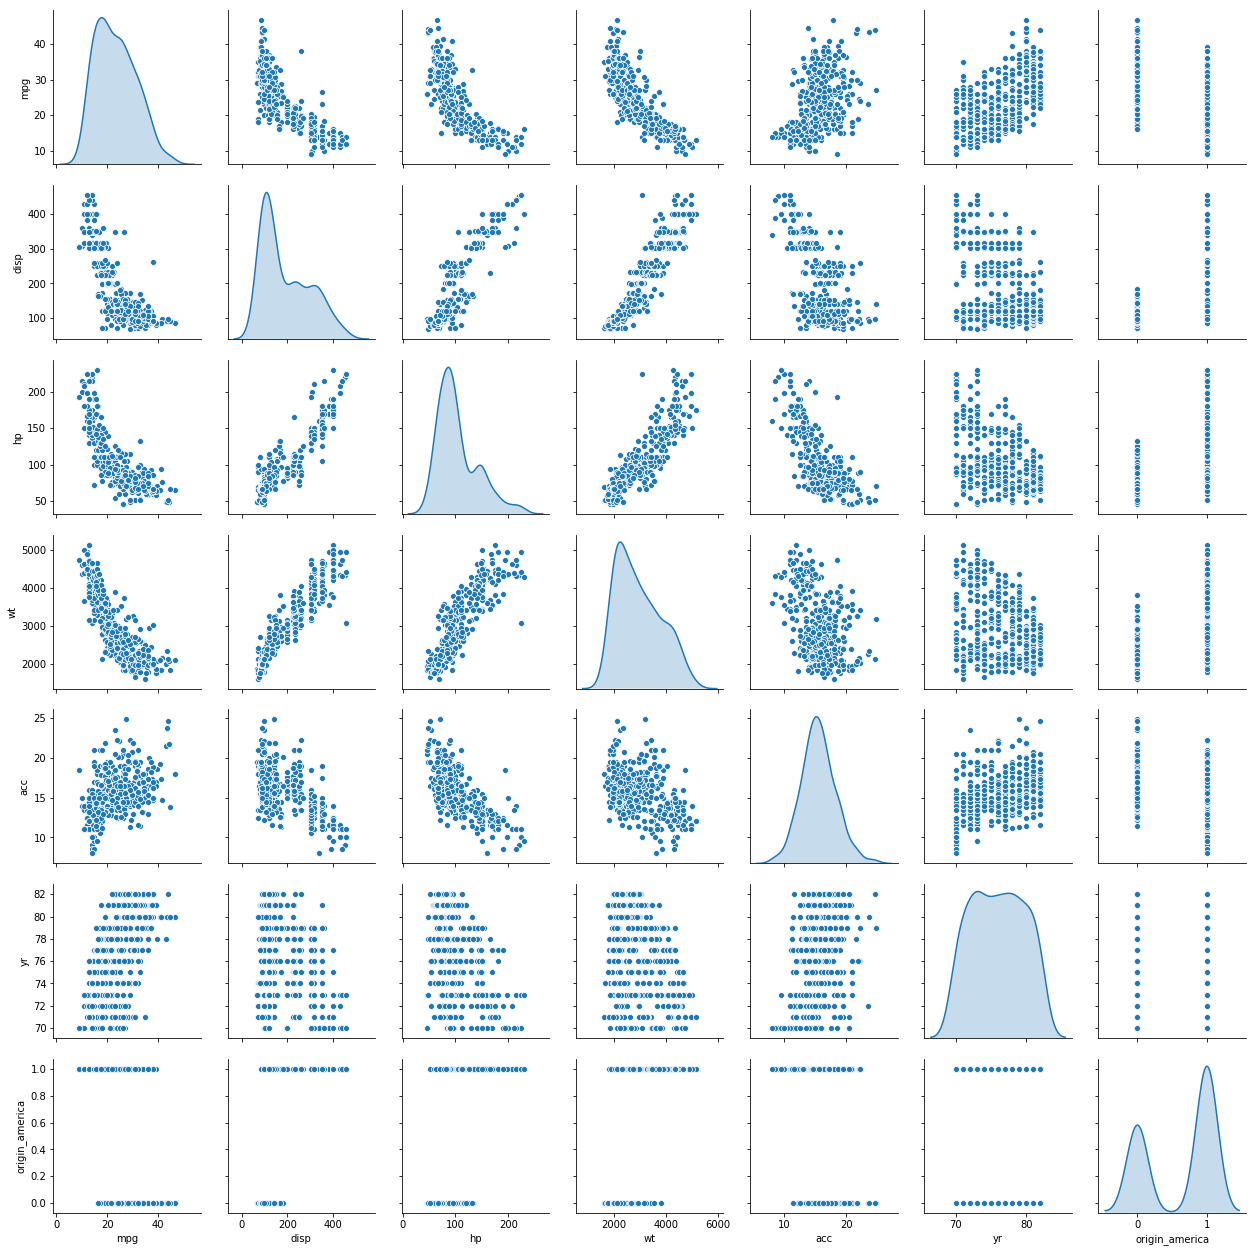

In [20]:
cData_attr = cData.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [21]:
# lets build our linear model
# independant variables
X = cData.drop(['mpg','origin_europe'], axis=1)
# the dependent variable
y = cData[['mpg']]

In [22]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## Fit Linear Model

In [23]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Here are the coefficients for each variable and the intercept

In [24]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for disp is 0.022577421315319163
The coefficient for hp is -0.04505785427327438
The coefficient for wt is -0.006215597044156964
The coefficient for acc is 0.00748361869710469
The coefficient for yr is 0.7769899686750962
The coefficient for origin_america is -2.139411529450258
The coefficient for origin_asia is 0.15348954432668363
The coefficient for cyl_3 is -4.017985449993671
The coefficient for cyl_4 is 2.0817805831884213
The coefficient for cyl_5 is 1.7113922035779292
The coefficient for cyl_6 is -1.1152661929909837
The coefficient for cyl_8 is 1.3400788562183106


In [25]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -16.56517622050956


The score (R^2) for in-sample and out of sample

In [26]:
regression_model.score(X_train, y_train)

0.8379876306288466

In [27]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)


0.8589739862237087

## Adding interaction terms 


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9141953859208559


In [29]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.7609686313946055


In [30]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 12)
(278, 79)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly. 
